In [ ]:
pip install wordcloud

In [ ]:
pip install seaborn


# importaremos as bibliotecas necessárias para o desenvolvimento do notebook

In [24]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Requisição de Dados da API - API REST - Utilizaremos a função request do pacote requests, passando o método (GET), a url (https://dadosabertos.camara.leg.br/api/v2/deputados) e os parametros. Utilizaremos a função loads da biblioteca json. Assim conseguimos obter os dados em um formato de dicionário.

In [67]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados/'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']
dados_parametros = objetos['dados']

O parâmetro deixado vazio vai exercer a função de filtro na requisição da API, trazendo assim a informação indicada conforme a nescessidade.

In [52]:
dados_parametros

[{'id': 220715,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220715',
  'nome': 'Amom Mandel',
  'siglaPartido': 'CIDADANIA',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37905',
  'siglaUf': 'AM',
  'idLegislatura': 57,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220715.jpg',
  'email': 'dep.amommandel@camara.leg.br'}]

In [48]:
df = pd.DataFrame(dados_parametros)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


O parâmetro deixado vazio vai exercer a função de filtro na requisição da API, trazendo assim a informação indicada conforme a nescessidade.

In [49]:
# Requisição dos dados dos Deputados utilizando parametros
url              = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros       = {'id': 220715}
resposta         = requests.request("GET", url, params=parametros)
objetos          = json.loads(resposta.text)
dados_parametros = objetos['dados']

Assim é possível fazer a extração na API conforme os parâmetros informados

In [50]:
dados_parametros

[{'id': 220715,
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220715',
  'nome': 'Amom Mandel',
  'siglaPartido': 'CIDADANIA',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37905',
  'siglaUf': 'AM',
  'idLegislatura': 57,
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220715.jpg',
  'email': 'dep.amommandel@camara.leg.br'}]

In [55]:
df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             512 non-null    int64 
 1   uri            512 non-null    object
 2   nome           512 non-null    object
 3   siglaPartido   512 non-null    object
 4   uriPartido     512 non-null    object
 5   siglaUf        512 non-null    object
 6   idLegislatura  512 non-null    int64 
 7   urlFoto        512 non-null    object
 8   email          512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


 Quantidade de deputados pela UF - Usaremos a função figure do matplotlib para ajustar o tamanho do gráfico. A função barplot do seaborn para gerar um gráfico de barras. E a função plot do matplotlib para exibir o gráfico gerado.

[]

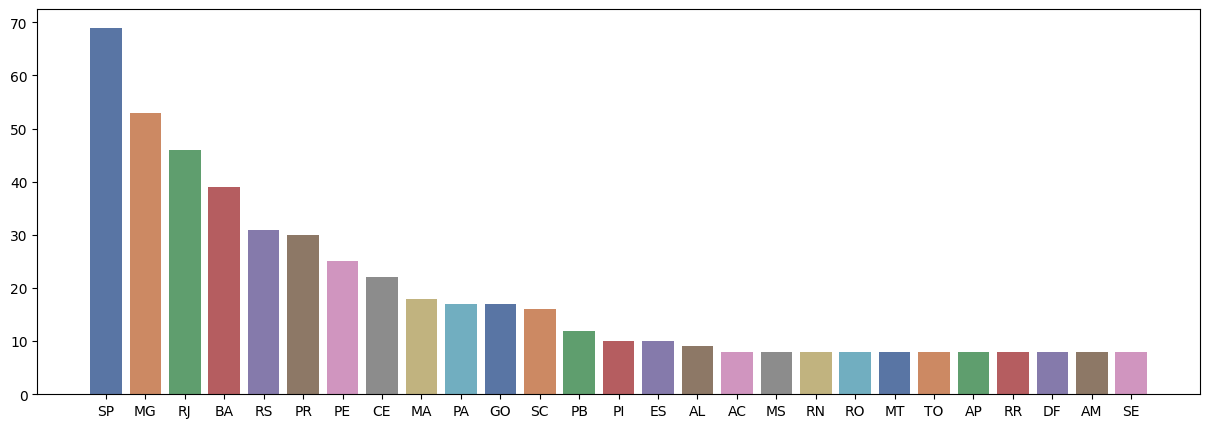

In [59]:
# Análise da quantidade de deputados pela UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

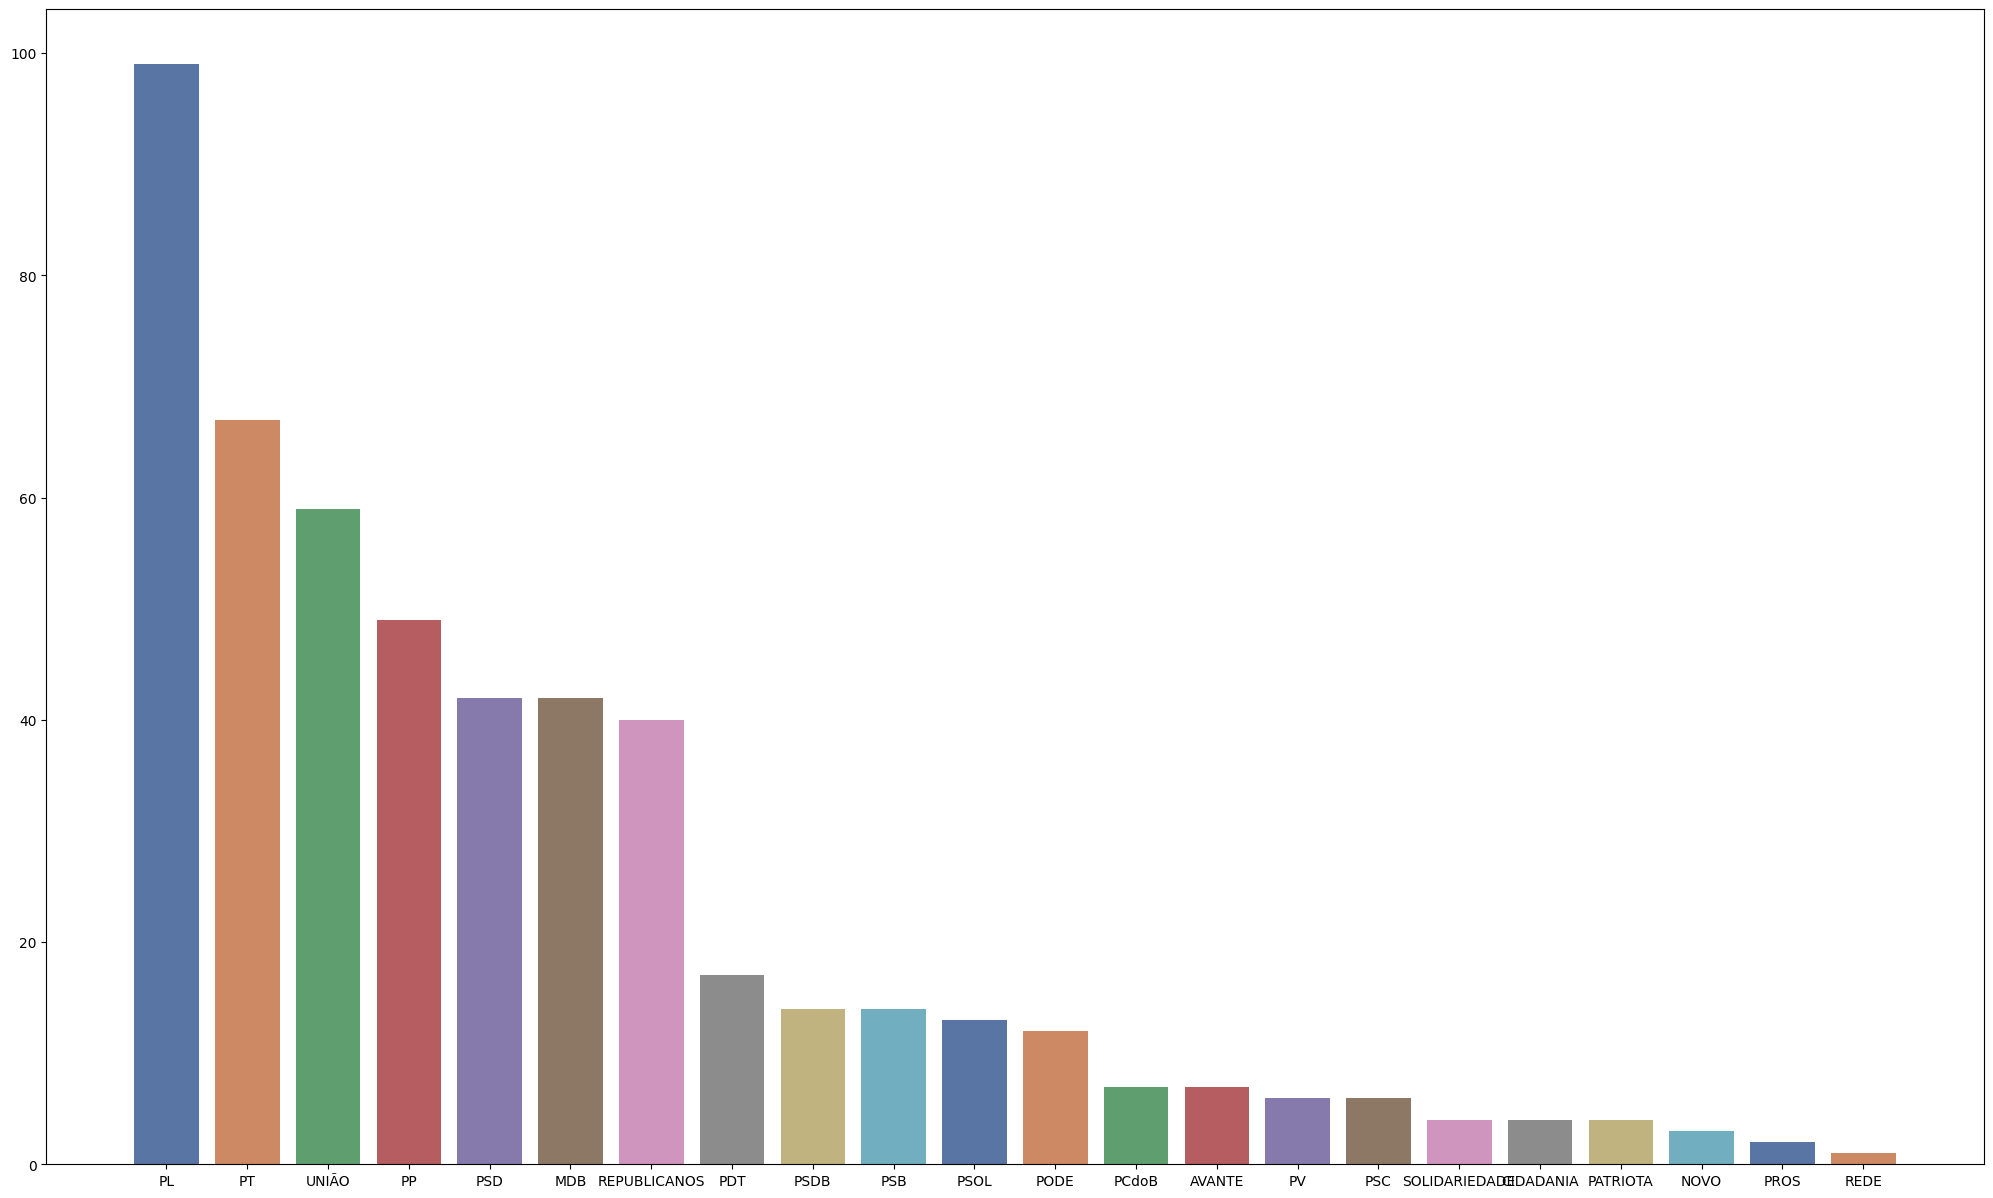

In [70]:
# Análise da quantidade de deputados pelo Partido
x = df['siglaPartido'].value_counts().index
y = df['siglaPartido'].value_counts().values
plt.figure(figsize = (25, 15))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

In [71]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/referencias/deputados/codSituacao'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']
dados_parametros = objetos['dados']